# USDT/Gold Price Prediction with LSTM

This notebook uses the last 5 years of USDT/Gold data (from 1 Jan 2020 to 6 June 2025) to build and evaluate an LSTM model for forecasting future prices.

## 1. Load and Visualize USDT/Gold Data

We will load the historical price data and visualize the closing price over time.

In [1]:
# Install TensorFlow and Keras for Python 3.11
!pip install --upgrade pip
!pip install tensorflow keras --upgrade

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Using cached keras-3.10.0-py3-none-any.whl (1.4 MB)

  Attempting uninstall: keras

    Found existing installation: keras 3.9.2

   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
    Uninstalling keras-3.9.2:
   ---------------------------------------- 0/2 [keras]
      Successfully uninstalled keras-3.9.2
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   ---------------------------------------- 0/2 [keras]
   --------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.2 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.16.2 requires tensorboard<2.17,>=2.16, but you have tensorboard 2.19.0 which is incompatible.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.19.0 which is incompatible.


  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-p

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


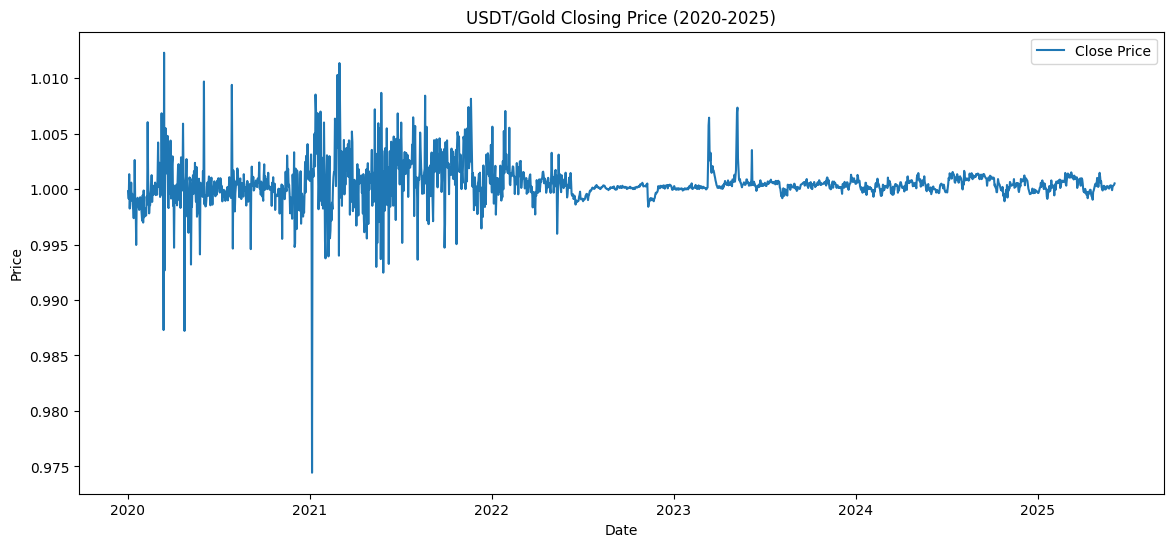

In [5]:
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Load data
# Use 'End' as the date column
df = pd.read_csv('tether_2020-01-01_2025-06-04 (1).csv', parse_dates=['End'])
df = df.sort_values('End')

# Filter for the last 5 years (if needed)
df = df[(df['End'] >= '2020-01-01') & (df['End'] <= '2025-06-06')]

# Visualize closing price
plt.figure(figsize=(14,6))
plt.plot(df['End'], df['Close'], label='Close Price')
plt.title('USDT/Gold Closing Price (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 2. Preprocess Data (Scaling, Sequencing for LSTM)

We will scale the data and create sequences suitable for LSTM input.

In [8]:
%pip install scikit-learn

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' column for prediction
data = df[['Close']].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 60
x, y = create_sequences(scaled_data, seq_length)

# Split into train/test
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Build and Train LSTM Model

We will build a simple LSTM model and train it on the historical data.

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Rebuild the model with more capacity and regularization
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Add callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the improved model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Re-run predictions with improved model
pred_test = model.predict(x_test)
pred_test_inv = scaler.inverse_transform(pred_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predict next 30 and 60 days with improved model
last_seq = scaled_data[-seq_length:]
pred_30 = predict_future(model, last_seq, 30, scaler)
pred_60 = predict_future(model, last_seq, 60, scaler)

c:\Users\ekted\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0926 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0926 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0028 - val_loss: 5.0096e-04 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0028 - val_loss: 5.0096e-04 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0027 - val_loss: 1.3576e-04 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0027 - val_loss: 1.3576e-04 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0030 - val_loss: 1.3712e-04 - learning_rate: 0.0010
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0030 - val_loss: 1.3712e-04 - learning_rate: 0.0010
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0026 - val_loss: 2.0064e-04 - learning_rate

## 4. Predict Next 30/60 Days

We will use the trained model to predict the next 30 and 60 days of prices.

In [20]:
# Predict next 30 and 60 days
def predict_future(model, last_sequence, days, scaler):
    future = []
    seq = last_sequence.copy()
    for _ in range(days):
        pred = model.predict(seq.reshape(1, seq_length, 1), verbose=0)[0][0]
        future.append(pred)
        seq = np.append(seq[1:], pred)
    return scaler.inverse_transform(np.array(future).reshape(-1, 1)).flatten()

last_seq = scaled_data[-seq_length:]
pred_30 = predict_future(model, last_seq, 30, scaler)
pred_60 = predict_future(model, last_seq, 60, scaler)

## 5. Plot and Evaluate Predictions

We will plot the model's predictions and compare them to the actual data.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


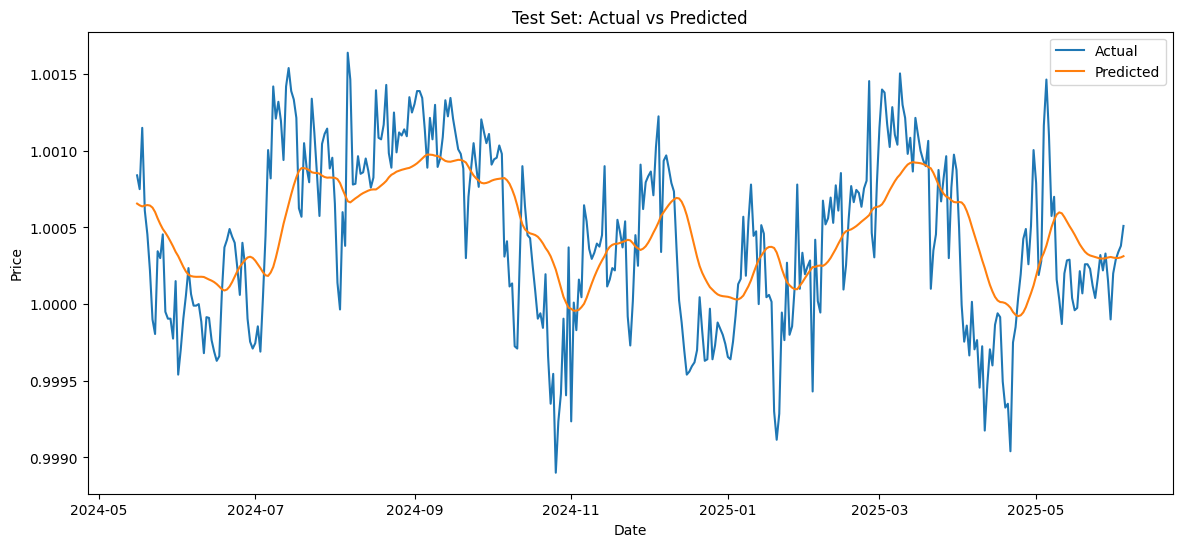

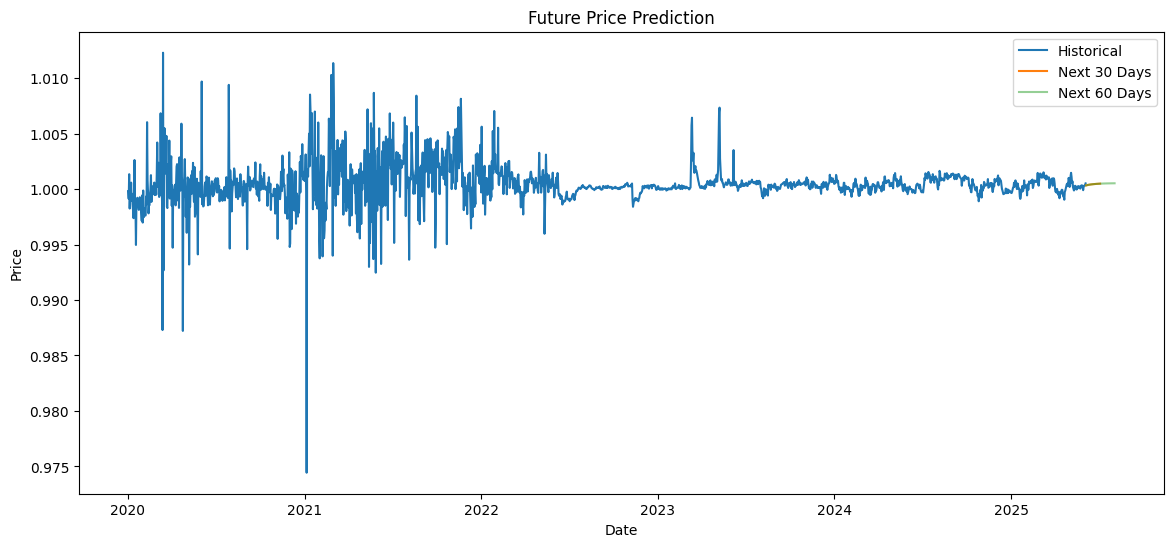

In [21]:
# Predict on test set
pred_test = model.predict(x_test)
pred_test_inv = scaler.inverse_transform(pred_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14,6))
plt.plot(df['End'][-len(y_test):], y_test_inv, label='Actual')
plt.plot(df['End'][-len(y_test):], pred_test_inv, label='Predicted')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot future predictions
future_dates_30 = pd.date_range(df['End'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_dates_60 = pd.date_range(df['End'].iloc[-1] + pd.Timedelta(days=1), periods=60)

plt.figure(figsize=(14,6))
plt.plot(df['End'], df['Close'], label='Historical')
plt.plot(future_dates_30, pred_30, label='Next 30 Days')
plt.plot(future_dates_60, pred_60, label='Next 60 Days', alpha=0.5)
plt.title('Future Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 6. Save Model and Future Predictions

We will save the trained model and export the future predictions to CSV.

In [22]:
# Save model
model.save('usdt_gold_lstm_model.h5')

# Save 30-day predictions
future_30_df = pd.DataFrame({
    'Date': future_dates_30,
    'Predicted_Close': pred_30
})
future_30_df.to_csv('usdt_gold_future_predictions_30.csv', index=False)

# Save 60-day predictions
future_60_df = pd.DataFrame({
    'Date': future_dates_60,
    'Predicted_Close': pred_60
})
future_60_df.to_csv('usdt_gold_future_predictions_60.csv', index=False)

Test RMSE: 0.000441
Test MAE: 0.000353
Test R2 Score: 0.3981


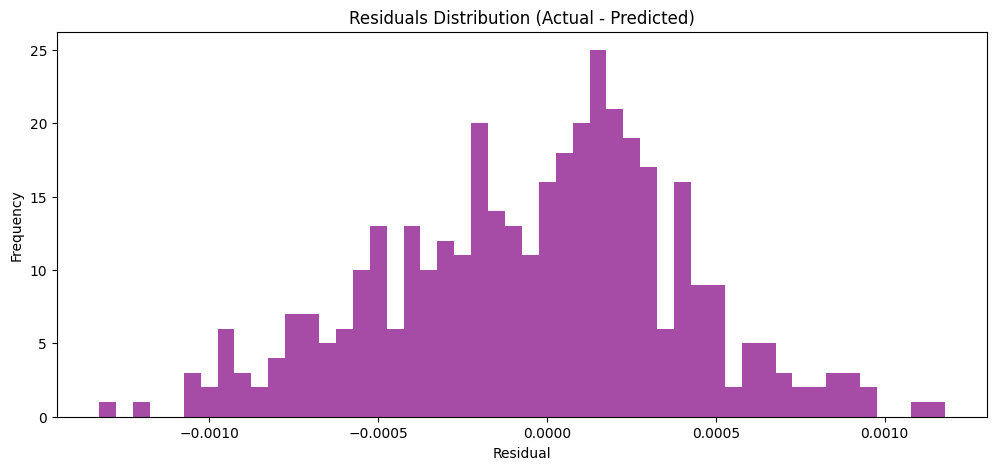

In [23]:
# Additional evaluation and visualization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics for test set
mse = mean_squared_error(y_test_inv, pred_test_inv)
mae = mean_absolute_error(y_test_inv, pred_test_inv)
r2 = r2_score(y_test_inv, pred_test_inv)
rmse = np.sqrt(mse)

print(f"Test RMSE: {rmse:.6f}")
print(f"Test MAE: {mae:.6f}")
print(f"Test R2 Score: {r2:.4f}")

# Plot residuals
residuals = y_test_inv.flatten() - pred_test_inv.flatten()
plt.figure(figsize=(12,5))
plt.hist(residuals, bins=50, color='purple', alpha=0.7)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


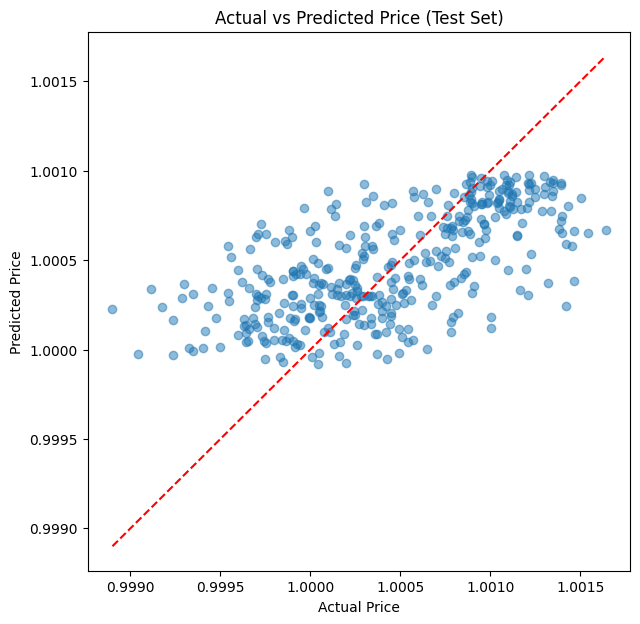

In [24]:

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test_inv, pred_test_inv, alpha=0.5)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Test Set)')
plt.show()


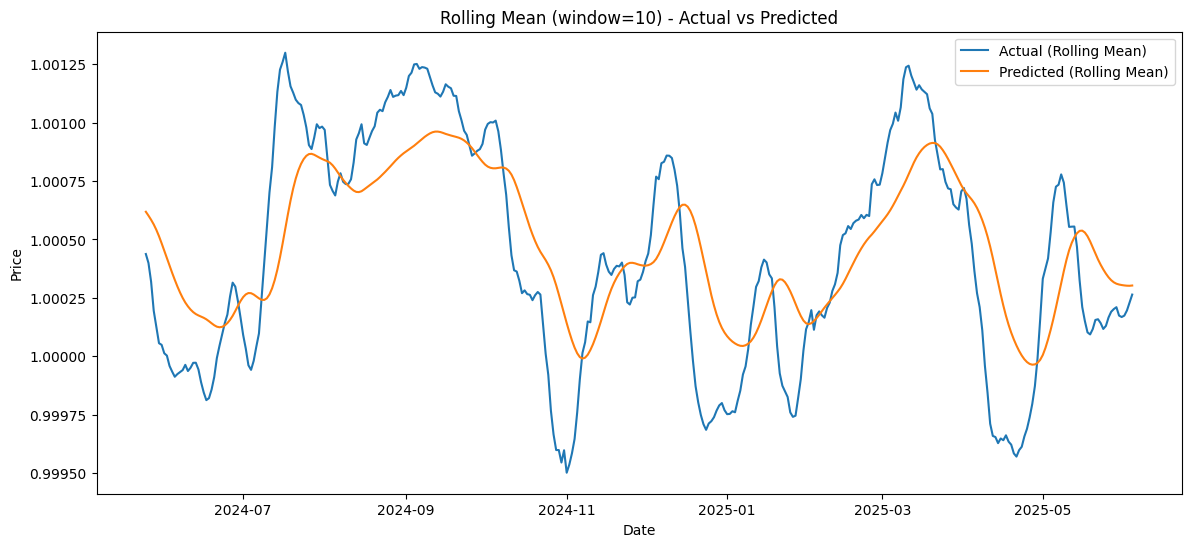

In [25]:

# Plot rolling mean of actual and predicted
window = 10
plt.figure(figsize=(14,6))
plt.plot(df['End'][-len(y_test):], pd.Series(y_test_inv.flatten()).rolling(window).mean(), label='Actual (Rolling Mean)')
plt.plot(df['End'][-len(y_test):], pd.Series(pred_test_inv.flatten()).rolling(window).mean(), label='Predicted (Rolling Mean)')
plt.title(f'Rolling Mean (window={window}) - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Notebook Complete

You have now built, trained, and evaluated an LSTM model for USDT/Gold price prediction, and saved the results for future use.